In [ ]:
from google.colab import drive
drive.mount('gdrive')

In [ ]:
cd gdrive/MyDrive/covenworks

In [ ]:
pwd

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('kc_house_data.csv')

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.tail()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.describe().transpose()

In [ ]:
dataset.info()

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [ ]:
dataset.info()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


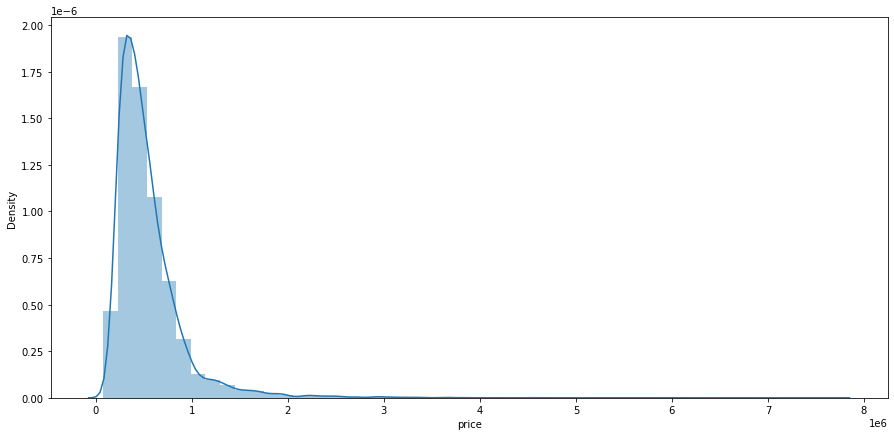

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(dataset['price'])

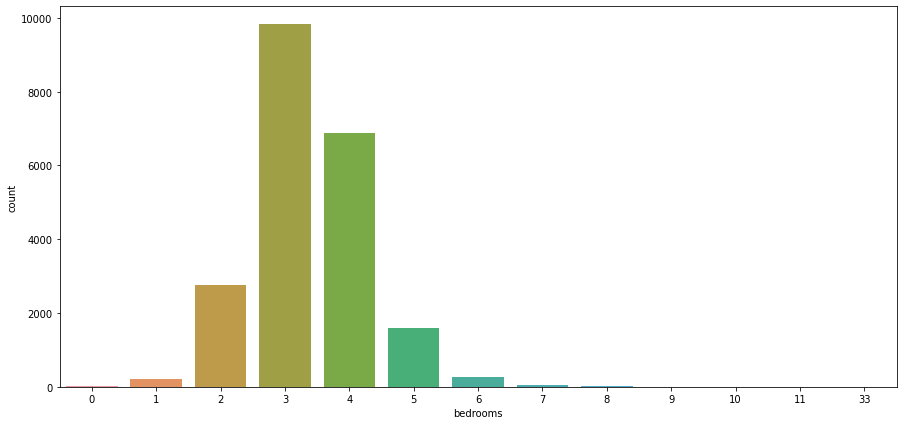

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=dataset['bedrooms'], data=dataset)

In [ ]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
dataset.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
dataset['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
dataset.drop('zipcode', axis=1, inplace =True)

In [ ]:
dataset.drop('id', axis=1, inplace =True)

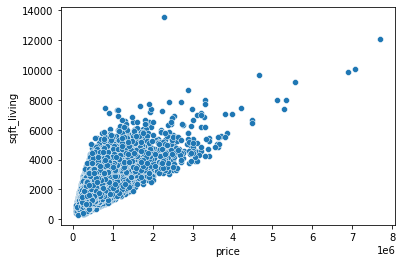

In [ ]:
sns.scatterplot(x='price', y='sqft_living', data=dataset)

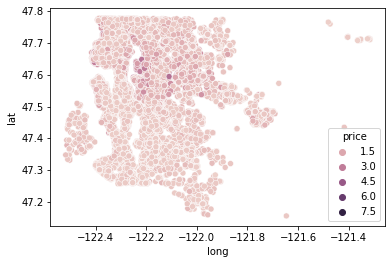

In [ ]:
sns.scatterplot(x='long', y ='lat', hue='price', data=dataset)

In [ ]:
len(dataset) * 0.02

432.26

In [ ]:
dataset = dataset.sort_values(by='price', ascending=False).iloc[432:]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


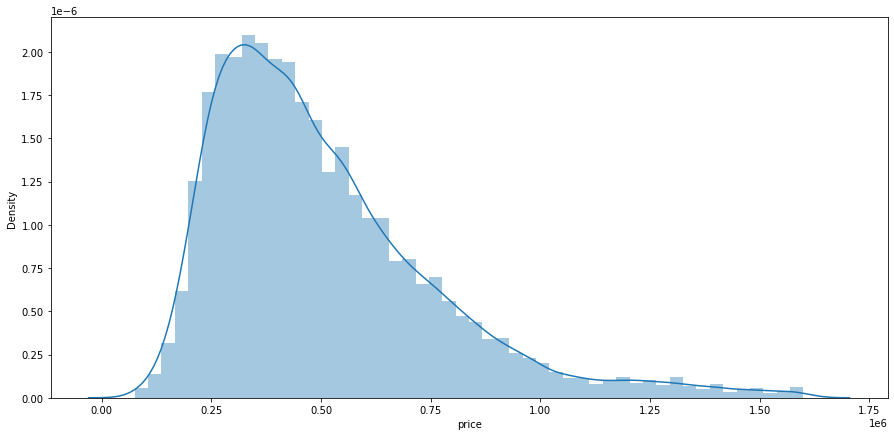

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(dataset['price'])

In [ ]:
dataset['year'] = dataset['date'].apply(lambda date: date.year)

In [ ]:
dataset['month'] = dataset['date'].apply(lambda date: date.month)

In [ ]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7433,2015-03-16,1600000.0,5,3.50,4050,20925,2.0,0,3,3,10,3020,1030,1973,2005,47.5348,-122.241,3880,18321,2015,3
527,2014-06-18,1600000.0,6,5.00,6050,230652,2.0,0,3,3,11,6050,0,2001,0,47.6033,-121.943,4210,233971,2014,6
18628,2015-02-17,1600000.0,4,3.50,3890,3600,2.0,0,0,3,9,2860,1030,2005,0,47.6342,-122.282,2460,6050,2015,2
4189,2014-10-01,1600000.0,4,2.75,3680,5000,2.0,0,3,3,9,2480,1200,1936,0,47.6599,-122.269,3200,5000,2014,10
2449,2014-05-22,1600000.0,3,2.50,3160,12824,1.0,0,2,4,9,1820,1340,1966,0,47.6151,-122.216,3390,11985,2014,5


In [ ]:
dataset.drop('date', axis=1, inplace =True)

In [ ]:
X = dataset.drop('price', axis=1).values
y = dataset['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Feature scaling is a step in data preprocessing which is applied to normalise a dataset. It helps normalise the daata within a particular range and it speeds up calculations on algorithms

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(14826, 19)

In [ ]:
7000 6500 --- error- -500

In [ ]:
model = Sequential()  #Assigning tensorflow model to a variable to add other layers
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), batch_size=128, epochs = 500)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,val_loss
0,3.218327e+11,3.200741e+11
1,3.211817e+11,3.178208e+11
2,3.119596e+11,2.964258e+11
3,2.648791e+11,2.161759e+11
4,1.536944e+11,8.951617e+10


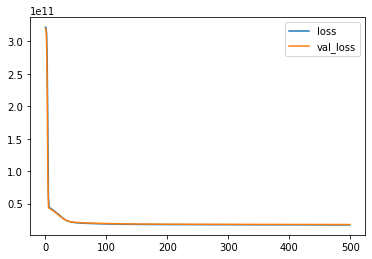

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([[250646.89],
       [436828.66],
       [696635.9 ],
       ...,
       [421677.34],
       [336048.25],
       [445741.47]], dtype=float32)

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test, predictions)

0.7277766526492015

Let's now apply our data to a fresh data

In [ ]:
singledata = dataset.drop('price', axis=1).iloc[2] #New dataset supplied by our boss

In [ ]:
singledata

bedrooms            4.0000
bathrooms           3.5000
sqft_living      3890.0000
sqft_lot         3600.0000
floors              2.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               9.0000
sqft_above       2860.0000
sqft_basement    1030.0000
yr_built         2005.0000
yr_renovated        0.0000
lat                47.6342
long             -122.2820
sqft_living15    2460.0000
sqft_lot15       6050.0000
year             2015.0000
month               2.0000
Name: 18628, dtype: float64

In [ ]:
single_house = scaler.transform(singledata.values.reshape(-1,19)) # Scaling our new dataset

In [ ]:
single_house

array([[0.12121212, 0.51851852, 0.4943662 , 0.00186572, 0.4       ,
        0.        , 0.        , 0.5       , 0.66666667, 0.3573487 ,
        0.36140351, 0.91304348, 0.        , 0.76698083, 0.19684385,
        0.38230384, 0.00620183, 1.        , 0.09090909]])

In [ ]:
model.predict(single_house)

array([[905345.7]], dtype=float32)